# Pre-Processing 


In [ ]:
from google.colab import drive
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path='/content/drive/My Drive/diagnosis.csv'

diagnosis=pd.read_csv(path)

In [ ]:
diagnosis.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(diagnosis.describe)

<bound method NDFrame.describe of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>


In [ ]:
diagnosis.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
diagnosis['diagnosis'] = diagnosis['diagnosis'].map({'M':1,'B':0})

y= diagnosis.diagnosis
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [ ]:
drop_list=['Unnamed: 32','id','diagnosis']
x=diagnosis.drop(drop_list, axis=1)
x.dtypes
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x = (x - x.mean()) / (x.std()) 
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [ ]:
diagnosis = pd.concat([y,x], axis = 1)
diagnosis.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


# Models implementation 


In [ ]:
#Split training and test sets 

from sklearn.model_selection import train_test_split 
#Split 70% train 30% test 
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state = 42 )

X_train.shape

(398, 30)

In [ ]:
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow as tf
from tensorflow import keras
#import keras
#For building the Neural Network layer by layer
from tensorflow.python.keras import Sequential
#To randomly initialize the weights to small numbers close to 0(But not 0)
from tensorflow.python.keras.layers import Dense

# **Support Vector Machine** 


Linear SVM Accuracy on 70% 30% split: 0.9766081871345029

70%, 30%:               precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



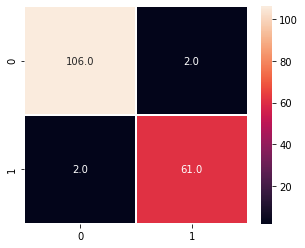

In [ ]:
#SVM linear 
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV

svm_lin = SVC(kernel = "linear")
svm_lin.fit(X_train, y_train)

y_pred_lin = svm_lin.predict(X_test)


print("Linear SVM Accuracy on 70% 30% split:", metrics.accuracy_score(y_test, y_pred_lin))
print("")

diagnosis_results_svm = metrics.classification_report(y_true = y_test, y_pred = y_pred_lin)
print("70%, 30%:",diagnosis_results_svm)


diagnosis_cm_svm = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_lin)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(diagnosis_cm_svm, annot=True, linewidths=.5, fmt= '.1f',ax=ax);




RBF SVM Accuracy on 70% 30% split: 0.9707602339181286

70%, 30%:               precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



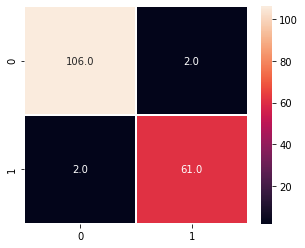

In [ ]:
#SVM rbf 
svm_rbf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, 
                         decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, 
                         probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy on 70% 30% split:", metrics.accuracy_score(y_test, y_pred_rbf))

print("")

diagnosis_results_rbf = metrics.classification_report(y_true = y_test, y_pred = y_pred_rbf)
print("70%, 30%:",diagnosis_results_rbf)


diagnosis_cm_rbf = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_rbf)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(diagnosis_cm_svm, annot=True, linewidths=.5, fmt= '.1f',ax=ax);


In [ ]:
#Parameter tuning 
param_grid = {'C': [0.1, 1, 10, 100],
                'gamma': [0.01, 0.1, 1, 10, 100],
                'kernel': ['rbf']}

grid_search = GridSearchCV(SVC(), param_grid, refit = True)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)



{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


SVM parameter tuned model on 70% 30% split: 0.9883040935672515
70%, 30%:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



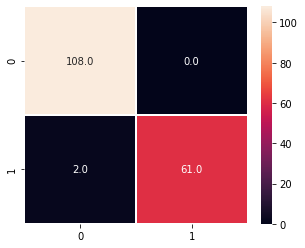

In [ ]:
model_PT = SVC(kernel = "rbf", C=10, gamma= 0.01)

model_PT.fit(X_train, y_train)
y_pred_PT = model_PT.predict(X_test)

print("SVM parameter tuned model on 70% 30% split:", metrics.accuracy_score(y_test, y_pred_PT))


diagnosis_result_rbf = metrics.classification_report(y_true = y_test, y_pred = y_pred_PT)
print("70%, 30%:",diagnosis_result_rbf)

diagnosis_cm_rbf = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_PT)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(diagnosis_cm_rbf, annot=True, linewidths=.5, fmt= '.1f',ax=ax);


# **Artificial Neural Network**

In [ ]:
#ANN
# refer(copy):https://www.kaggle.com/javapocalypse/breast-cancer-classification-in-keras-using-ann


## find out the tuned hyper parameters so commenting the code.



##Usual imports
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow as tf
from tensorflow import keras
#import keras
#For building the Neural Network layer by layer
from tensorflow.python.keras import Sequential
#To randomly initialize the weights to small numbers close to 0(But not 0)
from tensorflow.python.keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
  classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy')
  return classifier
 

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [1, 5],
               'epochs': [100, 120],
               'optimizer': ['adam', 'rmsprop']}
 
grid_search = GridSearchCV(estimator = classifier,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 10)
 
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("best_parameters: ")
print(best_parameters)
print("\nbest_accuracy: ")
print(best_accuracy)


In [ ]:
## build the neural network with the parameters we found above
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## Compiling ANN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the data
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

## Saving/Loading the model¶
from keras.models import load_model

classifier.save('breast_cancer_model.h5') #Save trained ANN
#classifier = load_model('breast_cancer_model.h5')  #Load trained ANN

## Making Predictions¶
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

Using TensorFlow backend.


Epoch 1/100
398/398 [==============================] - 1s 2ms/step - loss: 0.6106 - accuracy: 0.6131
Epoch 2/100
398/398 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8015
Epoch 3/100
398/398 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.9598
Epoch 4/100
398/398 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.9673
Epoch 5/100
398/398 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.9698
Epoch 6/100
398/398 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.9698
Epoch 7/100
398/398 [==============================] - 0s 1ms/step - loss: 0.2136 - accuracy: 0.9749
Epoch 8/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9799
Epoch 9/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9799
Epoch 10/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1540 - accura

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.predict(X_test)

array([[1.00000000e+00],
       [7.68162136e-06],
       [1.27720295e-12],
       [5.98595884e-09],
       [2.12029658e-16],
       [2.96958874e-10],
       [1.37127057e-17],
       [2.44201469e-13],
       [3.40622333e-13],
       [4.15491467e-26],
       [2.67481539e-07],
       [1.06570660e-05],
       [3.75106423e-17],
       [3.84236017e-07],
       [9.98536706e-01],
       [1.00000000e+00],
       [2.09092306e-16],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.42120604e-09],
       [2.68110534e-11],
       [1.00000000e+00],
       [1.69786396e-12],
       [7.26318724e-15],
       [1.00000000e+00],
       [9.42573385e-13],
       [1.00000000e+00],
       [6.39530204e-16],
       [1.00000000e+00],
       [5.46127558e-04],
       [1.00000000e+00],
       [5.48859025e-22],
       [1.00000000e+00],
       [1.65872621e-06],
       [1.00000000e+00],
       [1.90817628e-09],
       [1.00000000e+00],


# **Deep Neural Network**

In [ ]:
#DNN

#Creating the model and training

##Usual imports
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow as tf
from tensorflow import keras
#import keras
#For building the Neural Network layer by layer
from tensorflow.python.keras import Sequential
#To randomly initialize the weights to small numbers close to 0(But not 0)
from tensorflow.python.keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
  classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier
 

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [1, 5],
               'epochs': [100, 120],
               'optimizer': ['adam', 'rmsprop']}
 
grid_search = GridSearchCV(estimator = classifier,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 10)
 
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("best_parameters: ")
print(best_parameters)
print("\nbest_accuracy: ")
print(best_accuracy)



'\ndef build_classifier(optimizer):\n  classifier = Sequential()\n  classifier.add(Dense(units = 16, kernel_initializer = \'uniform\', activation = \'relu\', input_dim = 30))\n  classifier.add(Dense(units = 8, kernel_initializer = \'uniform\', activation = \'relu\'))\n  classifier.add(Dense(units = 6, kernel_initializer = \'uniform\', activation = \'relu\'))\n  classifier.add(Dense(units = 1, kernel_initializer = \'uniform\', activation = \'sigmoid\'))\n  classifier.compile(optimizer = optimizer, loss = \'binary_crossentropy\', metrics = [\'accuracy\'])\n  return classifier\n \n\nclassifier = KerasClassifier(build_fn = build_classifier)\n\nparameters = {\'batch_size\': [1, 5],\n               \'epochs\': [100, 120],\n               \'optimizer\': [\'adam\', \'rmsprop\']}\n \ngrid_search = GridSearchCV(estimator = classifier,\n                            param_grid = parameters,\n                            scoring = \'accuracy\',\n                            cv = 10)\n \ngrid_search = 

In [ ]:

## Creating the model
###Creating the model instance
model=Sequential()
### Adding Layers to the model
model.add(Dense(30, activation='sigmoid', input_shape=(389,30)))
model.add(Dense(27, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(54, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(27, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
###Compiling the model
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)
#### using Adam as optimizer and mean squared logarithmic error as loss function.


## Traning the model
model.fit(X_train, y_train, batch_size=30, epochs=2000, verbose=1, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test, verbose=1, batch_size=30)
print("Final result is {}".format(100 - loss*100))


Epoch 1/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.1980 - val_loss: 0.1706
Epoch 2/2000
14/14 [==============================] - 0s 7ms/step - loss: 0.1499 - val_loss: 0.1286
Epoch 3/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.1268 - val_loss: 0.1132
Epoch 4/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.1206 - val_loss: 0.1103
Epoch 5/2000
14/14 [==============================] - 0s 7ms/step - loss: 0.1155 - val_loss: 0.1095
Epoch 6/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.1130 - val_loss: 0.1083
Epoch 7/2000
14/14 [==============================] - 0s 7ms/step - loss: 0.1138 - val_loss: 0.1068
Epoch 8/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.1146 - val_loss: 0.1049
Epoch 9/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.1105 - val_loss: 0.1024
Epoch 10/2000
14/14 [==============================] - 0s 7ms/step - loss: 0.1031 - val_loss: 0.099

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 389, 30)           930       
_________________________________________________________________
dense_1 (Dense)              (None, 389, 27)           837       
_________________________________________________________________
dropout_1 (Dropout)          (None, 389, 27)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 389, 54)           1512      
_________________________________________________________________
dropout_2 (Dropout)          (None, 389, 54)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 389, 27)           1485      
_________________________________________________________________
dropout_3 (Dropout)          (None, 389, 27)           0

In [ ]:
## Creating the model
###Creating the model instance
model=Sequential()
### Adding Layers to the model
model.add(Dense(30, activation='sigmoid', input_shape=(389,30)))
model.add(Dense(27, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(54, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(27, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
###Compiling the model
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)
#### using Adam as optimizer and mean squared logarithmic error as loss function.


## Traning the model
model.fit(X_train, y_train, batch_size=30, epochs=2000, verbose=1, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test, verbose=1, batch_size=30)
print("Final result is {}".format(100 - loss*100))

Epoch 1/2000
14/14 [==============================] - 0s 26ms/step - loss: 0.1526 - val_loss: 0.1307
Epoch 2/2000
14/14 [==============================] - 0s 12ms/step - loss: 0.1262 - val_loss: 0.1139
Epoch 3/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.1147 - val_loss: 0.1104
Epoch 4/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.1159 - val_loss: 0.1098
Epoch 5/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.1159 - val_loss: 0.1090
Epoch 6/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.1102 - val_loss: 0.1072
Epoch 7/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.1119 - val_loss: 0.1052
Epoch 8/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.1104 - val_loss: 0.1025
Epoch 9/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.1052 - val_loss: 0.0986
Epoch 10/2000
14/14 [==============================] - 0s 10ms/step - loss: 0.1000 - val_lo

# Feature Selection

In [ ]:
#feature selection by removing high correlation features 
corr = x.corr()
features = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.6:
      if features[j]:
        features[j] = False


#selected_features = x.columns[features]

# new data with selected features 
#x_new = x[selected_features]
#x_new.shape

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_new = x 
x_new = x_new.drop(drop_list1,axis = 1 )       
x_new.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.071512,0.983510,1.567087,2.650542,2.215566,2.253764,-0.564768,2.485391,-0.213814,0.723390,1.147747,0.906286,1.306537,2.107672,2.748204,1.935312
1,-0.353322,1.907030,-0.826235,-0.023825,0.001391,-0.867889,-0.875473,0.741749,-0.604819,-0.440393,-0.804742,-0.099356,-0.375282,-0.146620,-0.243675,0.280943
2,0.455786,1.557513,0.941382,1.362280,0.938859,-0.397658,-0.779398,1.180298,-0.296744,0.212889,0.236827,0.293301,0.526944,0.854222,1.151242,0.201214
3,0.253509,-0.763792,3.280667,1.914213,2.864862,4.906602,-0.110312,-0.288125,0.689095,0.818798,4.728520,2.045711,3.391291,1.987839,6.040726,4.930672
4,-1.150804,1.824624,0.280125,1.369806,-0.009552,-0.561956,-0.789549,1.189310,1.481763,0.827742,-0.360775,0.498889,0.220362,0.612640,-0.867590,-0.396751


In [ ]:
#split new data 
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(x_new, y, test_size=0.3, random_state = 42)

X_train_new.shape

(398, 16)

In [ ]:
#SVM model with feature selection 
SVM_FS = model_PT.fit(X_train_new, y_train_new)

y_pred_FS = SVM_FS.predict(X_test_new)

print("Accuracy:", metrics.accuracy_score(y_test_new, y_pred_FS))

Accuracy: 0.9883040935672515


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif)

x_kbest = selector.fit_transform(x,y)
x_kbest.shape

(569, 10)

In [ ]:
X_train_kbest,X_test_kbest,y_train_kbest,y_test_kbest = train_test_split(x_kbest, y, test_size=0.3, random_state = 42)

SVM_kbest = model_PT.fit(X_train_kbest, y_train_kbest)

y_pred_Kbest = SVM_kbest.predict(X_test_kbest)

print("Accuracy:", metrics.accuracy_score(y_test_kbest, y_pred_Kbest))

Accuracy: 0.9473684210526315


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(171, 30)

In [ ]:
SVM_PCA = model_PT.fit(X_train_pca, y_train)

y_pred_PCA = SVM_PCA.predict(X_test_pca)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_PCA))

Accuracy: 0.9883040935672515


In [ ]:
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow as tf
from tensorflow import keras
#import keras
#For building the Neural Network layer by layer
from tensorflow.python.keras import Sequential
#To randomly initialize the weights to small numbers close to 0(But not 0)
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import confusion_matrix

from keras.wrappers.scikit_learn import KerasClassifier


classifier_FS = Sequential() 

classifier_FS.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier_FS.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier_FS.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier_FS.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier_FS.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier_FS.fit(X_train_new, y_train_new, batch_size = 1, epochs = 100, verbose = 1)



Epoch 1/100
398/398 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.6558
Epoch 2/100
398/398 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.9322
Epoch 3/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.9573
Epoch 4/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9673
Epoch 5/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9698
Epoch 6/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9774
Epoch 7/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9724
Epoch 8/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9774
Epoch 9/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9774
Epoch 10/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0959 - accura

In [ ]:
score_fs = classifier_FS.evaluate(X_test_new, y_test_new, verbose = 1 , batch_size = 30)

y_pred_fs = classifier_FS.predict(X_test_new)
y_pred_fs = (y_pred_fs > 0.5)

cm = confusion_matrix(y_test_new, y_pred_fs)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

6/6 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.9649
Accuracy: 96.49122807017544%


In [ ]:
classifier_kb = Sequential() 

classifier_kb.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier_kb.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier_kb.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier_kb.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier_kb.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier_kb.fit(X_train_kbest, y_train, batch_size = 1, epochs = 100, verbose = 1)




Epoch 1/100
398/398 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.6357
Epoch 2/100
398/398 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.9347
Epoch 3/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1921 - accuracy: 0.9271
Epoch 4/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1952 - accuracy: 0.9296
Epoch 5/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9322
Epoch 6/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9347
Epoch 7/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9347
Epoch 8/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1955 - accuracy: 0.9347
Epoch 9/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1959 - accuracy: 0.9347
Epoch 10/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1919 - accura

In [ ]:
score_kb = classifier_kb.evaluate(X_test_kbest, y_test, verbose = 1 , batch_size = 30)

y_pred_kb = classifier_kb.predict(X_test_kbest)
y_pred_kb = (y_pred_kb > 0.5)

cm = confusion_matrix(y_test, y_pred_kb)


accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

6/6 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9708
Accuracy: 97.07602339181285%


In [ ]:
#ANN with feature selection & grid search parameters 

classifier_PCA = Sequential() 

classifier_PCA.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier_PCA.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier_PCA.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier_PCA.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier_PCA.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier_PCA.fit(X_train_pca, y_train_new, batch_size = 1, epochs = 100, verbose = 1)



Epoch 1/100
398/398 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.7487
Epoch 2/100
398/398 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9598
Epoch 3/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9724
Epoch 4/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9774
Epoch 5/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9824
Epoch 6/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9824
Epoch 7/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9849
Epoch 8/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9824
Epoch 9/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9799
Epoch 10/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0613 - accura

In [ ]:
score_pca = classifier_PCA.evaluate(X_test_pca, y_test_new, verbose = 1 , batch_size = 30)

y_pred_pca = classifier_PCA.predict(X_test_pca)
y_pred_pca = (y_pred_pca > 0.5)

cm = confusion_matrix(y_test, y_pred_pca)


accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

6/6 [==============================] - 0s 1ms/step - loss: 1.5191 - accuracy: 0.9532
Accuracy: 95.32163742690058%


# Random Forest


0.9707602339181286
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



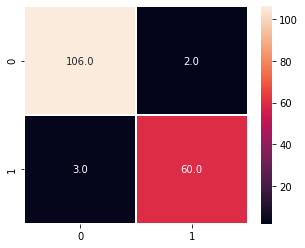

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

y_pred_RF = model_RF.predict(X_test)

print( metrics.accuracy_score(y_test, y_pred_RF))

diagnosis_results_rf = metrics.classification_report(y_true = y_test, y_pred = y_pred_RF)
print(diagnosis_results_rf)


diagnosis_cm_rf = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_RF)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(diagnosis_cm_rf, annot=True, linewidths=.5, fmt= '.1f',ax=ax);


# Decision Tree



Accuracy: 0.9181286549707602
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       108
           1       0.86      0.94      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



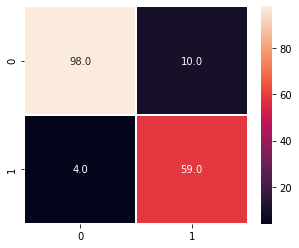

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

y_pred_DT = model_DT.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_DT))


diagnosis_results_dt = metrics.classification_report(y_true = y_test, y_pred = y_pred_DT)
print(diagnosis_results_dt)


diagnosis_cm_dt = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_DT)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(diagnosis_cm_dt, annot=True, linewidths=.5, fmt= '.1f',ax=ax);


# Naive Bayes

Accuracy: 0.935672514619883
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



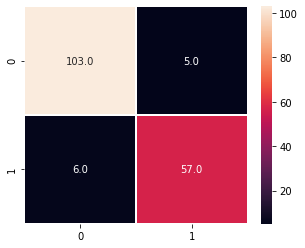

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

y_pred_NB = model_NB.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NB))

diagnosis_results_nb = metrics.classification_report(y_true = y_test, y_pred = y_pred_NB)
print(diagnosis_results_nb)


diagnosis_cm_nb = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_NB)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(diagnosis_cm_nb, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# Logistic Regression 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.023921
         Iterations 19
                               Results: Logit
Model:                  Logit               Pseudo R-squared:    0.964      
Dependent Variable:     diagnosis           AIC:                 87.2221    
Date:                   2020-05-27 07:28    BIC:                 217.5385   
No. Observations:       569                 Log-Likelihood:      -13.611    
Df Model:               29                  LL-Null:             -375.72    
Df Residuals:           539                 LLR p-value:         8.6176e-134
Converged:              1.0000              Scale:               1.0000     
No. Iterations:         19.0000                                             
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
----------------------------------------------------------------------------
radi

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_LR = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



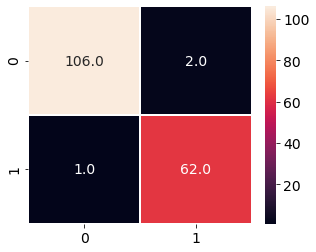

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))


diagnosis_cm_lr = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_LR)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(diagnosis_cm_lr, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(RandomForestClassifier(),x,y,cv=10, 
               scoring="accuracy", 
               train_sizes=np.linspace(0.01,1,50),
               verbose=1)

[learning_curve] Training set sizes: [  5  15  25  36  46  56  67  77  87  98 108 118 129 139 149 160 170 180
 191 201 212 222 232 243 253 263 274 284 294 305 315 325 336 346 356 367
 377 387 398 408 418 429 439 449 460 470 480 491 501 512]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.4min finished


In [ ]:
train_mean=np.mean(train_scores,axis=1)
train_mean

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99979633, 1.        , 1.        ])

In [ ]:
train_std=np.std(train_scores, axis=1)
train_std

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.000611,
       0.      , 0.      ])

In [ ]:
test_mean=np.mean(test_scores,axis=1)
test_mean

array([0.37258772, 0.37258772, 0.76466165, 0.75770677, 0.69420426,
       0.84354637, 0.86121554, 0.88928571, 0.89981203, 0.91744987,
       0.92089599, 0.92095865, 0.93853383, 0.93677945, 0.94379699,
       0.95429198, 0.94730576, 0.94555138, 0.95084586, 0.94909148,
       0.95432331, 0.95078321, 0.95432331, 0.95084586, 0.94909148,
       0.95084586, 0.95084586, 0.94558271, 0.95435464, 0.95084586,
       0.95260025, 0.95435464, 0.95961779, 0.95610902, 0.95435464,
       0.96312657, 0.96488095, 0.95961779, 0.96666667, 0.96137218,
       0.95610902, 0.96140351, 0.96491228, 0.96488095, 0.96666667,
       0.96484962, 0.95786341, 0.96140351, 0.96315789, 0.96137218])

In [ ]:
test_std=np.std(test_scores, axis=1)
test_std

array([0.00696596, 0.00696596, 0.13439965, 0.13813368, 0.10263384,
       0.04941067, 0.05831933, 0.05322648, 0.0392977 , 0.03134437,
       0.03446663, 0.036943  , 0.03526011, 0.03341949, 0.03487454,
       0.03349244, 0.03677091, 0.03273826, 0.03575506, 0.03178898,
       0.03155861, 0.03492242, 0.03436013, 0.03015095, 0.03955447,
       0.03015095, 0.03398984, 0.03544784, 0.03251211, 0.03488362,
       0.03330542, 0.03435334, 0.02605358, 0.02853061, 0.03251211,
       0.03275632, 0.02715876, 0.03511133, 0.02411882, 0.03399954,
       0.03160171, 0.03215843, 0.03508772, 0.03233242, 0.02768374,
       0.02353831, 0.04014068, 0.0301836 , 0.02654868, 0.02912356])

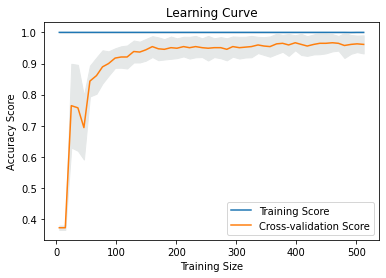

In [ ]:
plt.plot(train_sizes,train_mean, label="Training Score")
plt.plot(train_sizes,test_mean, label="Cross-validation Score")

plt.fill_between(train_sizes,train_mean-train_std, train_mean+train_std, color="#E5E8E8")
plt.fill_between(train_sizes,test_mean-test_std, test_mean+test_std,color="#E5E8E8")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc='best')